# Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста

**Описание задачи:**
    
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


После интерпретации результатов теста необходимо принять решение:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**План работы:**

- Применить два фреймворка для приоритезации гипотез 


- Построить график кумулятивной выручки по группам


- Построить график кумулятивного среднего чека по группам


- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.


- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 


- Построить точечный график количества заказов по пользователям.


- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 


- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 


- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 


- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 



### Описание данных

**Данные для первой части**

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

*Файл orders.csv*
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

*Файл visitors.csv*
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Работа с гипотезами

In [2]:
# Загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Предобработка данных

In [3]:
data = pd.read_csv('/datasets/hypothesis.csv')
df = pd.DataFrame() 
cd = pd.DataFrame()

In [4]:
# Переименуем столбцы
data = data.rename(columns = {'Hypothesis':'hypothesis', 'Reach':'reach', 
                              'Impact':'impact', 'Confidence':'confidence', 'Efforts':'efforts'})

In [5]:
# Расчет показателей
data['rice_score'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
data['ice_score'] = data['confidence'] * data['impact'] / data['efforts']

In [6]:
data

,hypothesis,reach,impact,confidence,efforts,rice_score,ice_score
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,40.0,13.333333
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,4.0,2.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,56.0,7.000000
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,9.0,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,3.0,1.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,4.0,1.333333
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,40.0,8.000000
7,Добавить форму подписки на все основные страни...,10,7,8,5,112.0,11.200000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.200000


#### Подсчет приоритетности

In [7]:
df = data[['hypothesis', 'rice_score']]
df.sort_values( by = 'rice_score', ascending = False)

,hypothesis,rice_score
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [8]:
cd = data[['hypothesis', 'ice_score']]
cd.sort_values( by = 'ice_score', ascending = False)

,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Гипотеза 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" оказалась на первом месте в RICE.
А в ICE первое место заняла гипотеза 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 
Это связано с тем, что добавился показатель охвата аудитории (reach), а у 7 гипотезы охват максимальный.
В случае работы на большую аудиторию считаю фреймворк RICE более актуальным и отдаю ему предпочтение.

Вывод: к рассмотрению рекомендуется проверить в первую очередь гипотезу 7.

## A/B тест

In [9]:
orders = pd.read_csv('/datasets/orders.csv')

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv') 

### Предобработка данных

In [11]:
# Рассмотрим типы данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
# Проверка на полные дупликаты
orders.duplicated().sum()

0

In [13]:
# Рассмотрим типы данных
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
# Проверка на полные дупликаты
visitors.duplicated().sum()

0

In [15]:
# Удалим дупликаты для определенных столбцов
print(orders[['date','group']].duplicated().sum())

filtred = orders[['date','group']].drop_duplicates()

print(filtred[['date','group']].duplicated().sum())

1135
0


In [16]:
# Приведём к нижнему регистру и добавим нужнее подчёркивание для удобства чтения

orders.columns = orders.columns.str.replace('Id', '_id') 

# Приведём столбцы с датой к типу datetime

orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d') 

### Подготовка данных для построения графиков

In [17]:
ordersAggregated = (filtred
        .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 
              'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']))

In [18]:
visitorsAggregated = (filtred
        .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']))

In [19]:
commonframe = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [20]:
commonframe.head(5)

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [21]:
cumulative_dataA = commonframe[commonframe['group'] == 'A']
cumulative_dataB = commonframe[commonframe['group'] == 'B']

### Кумулятивная выручка

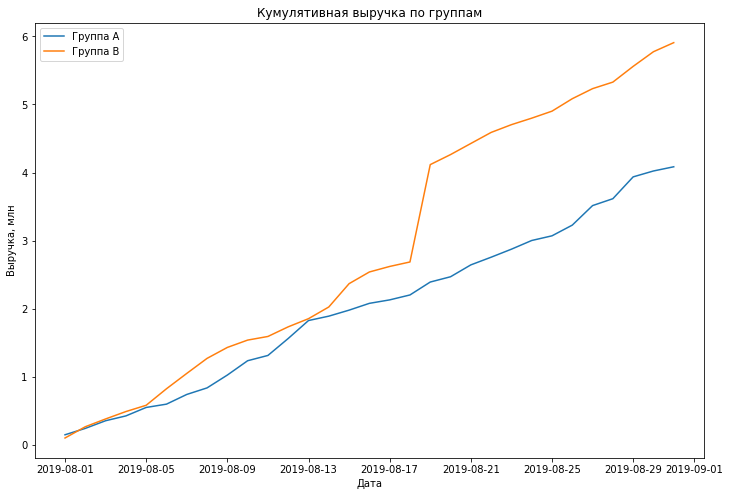

In [22]:
plt.figure(figsize=(12,8))  

# Строим график выручки группы А
plt.plot(cumulative_dataA['date'], cumulative_dataA['revenue']/1000000, label='A')

# Строим график выручки группы B
plt.plot(cumulative_dataB['date'], cumulative_dataB['revenue']/1000000, label='B')

plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Выручка, млн') 
plt.show() 

Графики плавные и расвномерно растут, что говорит о верном построении. 
По началу графики обоих групп показывают примерно одинаковый рост, но начиная приблизительно с 19.08.19 у группы B произошел резкий всплеск выручки.

### Средний чек

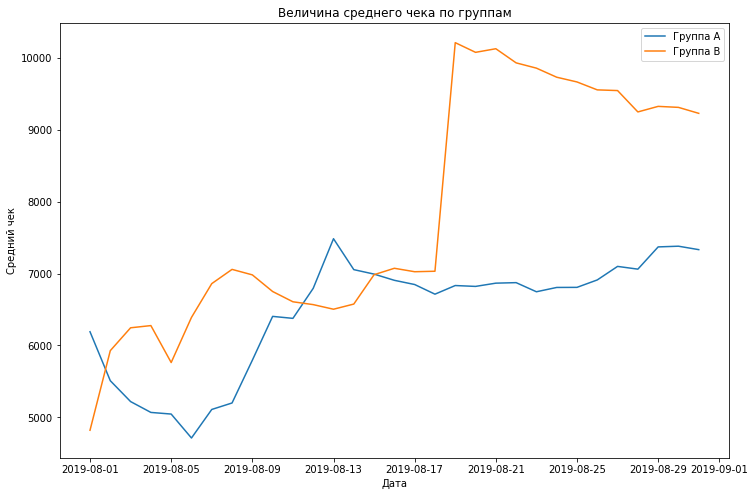

In [23]:
plt.figure(figsize=(12,8))

plt.plot(cumulative_dataA['date'], cumulative_dataA['revenue']/cumulative_dataA['transaction_id'], label='A')
plt.plot(cumulative_dataB['date'], cumulative_dataB['revenue']/cumulative_dataB['transaction_id'], label='B')

plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Величина среднего чека по группам')
plt.show() 

На графике среднего чека так же заметен скачок у группы B, в тот же промежуток времени, видимо, в этот момент произошли какие-то дорогие покупки. Однако, к концу рассматриваемого периода у группы B наметилась тенденция к снижению. Следует продолжить тест, чтобы уточнить этот момент.

### Соотношение средних чеков

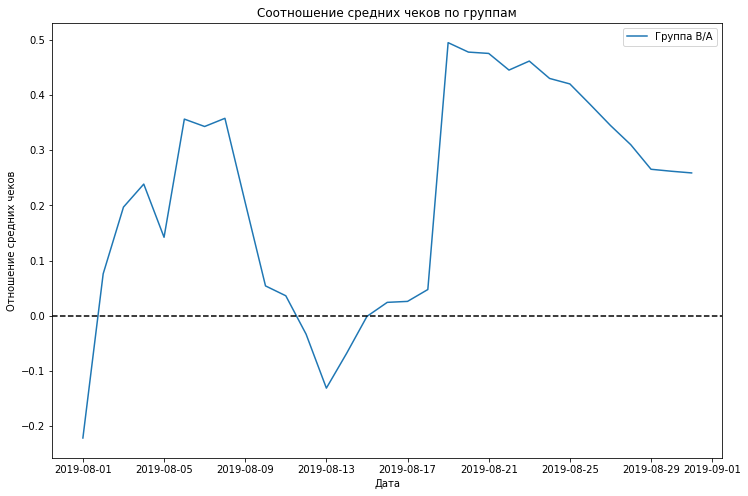

In [24]:
# Cобираем данные в одном датафрейме

merged_cumulative_revenue = cumulative_dataA.merge(cumulative_dataB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

# Cтроим отношение средних чеков

plt.figure(figsize=(12,8))
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['transaction_idB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['transaction_idA'])-1)

plt.legend(['Группа B/A']) 
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.title('Соотношение средних чеков по группам')

# Добавляем ось X

plt.axhline(y=0, color='black', linestyle='--') 

График в целом отражает картину полученную раньше, в тех периодах, где график B группы был выше группы A соотношение средних чеков положительное. Можно отметить не постояноство и скачкообразный характер зависимости.

### Кумулятивная конверсия

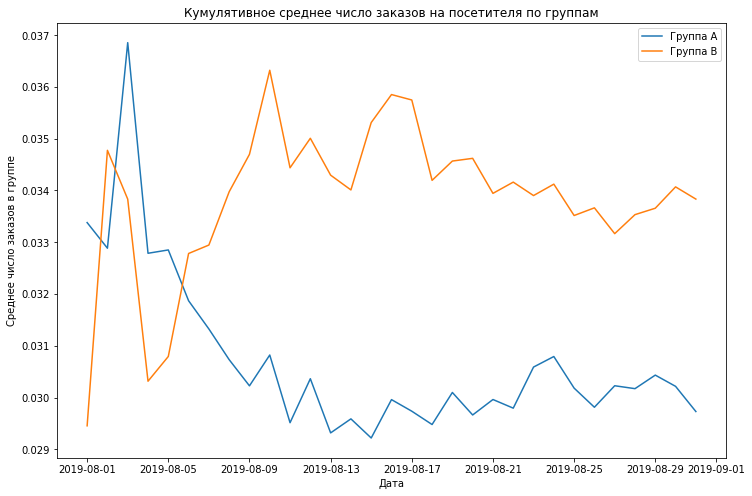

In [25]:
# Считаем кумулятивную конверсию
commonframe['conversion'] = commonframe['transaction_id']/commonframe['visitors']

# Отделяем данные по группе A
cumulative_dataA = commonframe[commonframe['group']=='A']

# Отделяем данные по группе B
cumulative_dataB = commonframe[commonframe['group']=='B']

# Строим графики
plt.figure(figsize=(12,8))
plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], label='Группа А')
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'], label='Группа B')
plt.xlabel('Дата')
plt.ylabel('Среднее число заказов в группе')
plt.title('Кумулятивное среднее число заказов на посетителя по группам')
plt.legend()

Графики конверсии имеют определенные флуктуации, но ближе к концу значения колеблются возле 0.034 для B, и 0.03 для А.Метрика стабилизировалась дополнительного времени на продолжение теста не требуется.

### Относительное различие кумулятивной конверсии

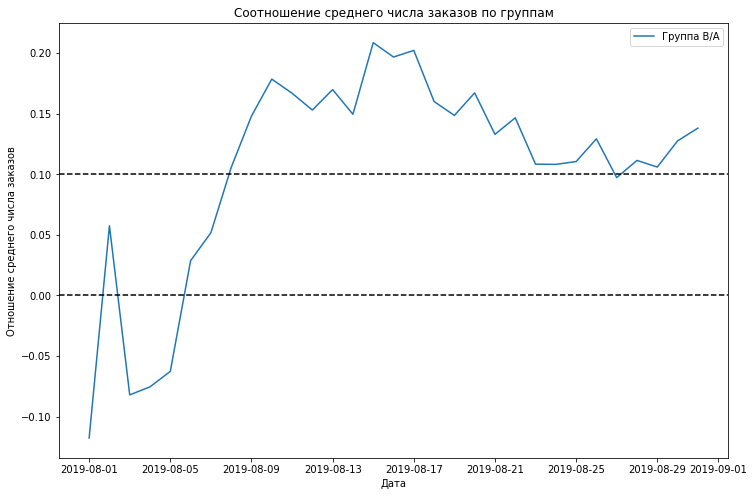

In [26]:
merged_cumulative_conversions = (cumulative_dataA[['date','conversion']]
    .merge(cumulative_dataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']))


plt.figure(figsize=(12,8))

plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, 
         label="Относительное изменение группы В/А")

plt.legend(['Группа B/A']) 
plt.xlabel('Дата')
plt.ylabel('Отношение среднего числа заказов')
plt.title('Соотношение среднего числа заказов по группам')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')

График отражает периоды, когда конверсия группы B была выше, чем группы А. Отметим, что на протяжении почти всего теста число заказов группы B было выше более чем на 10%

### Точечный график количества заказов по пользователям

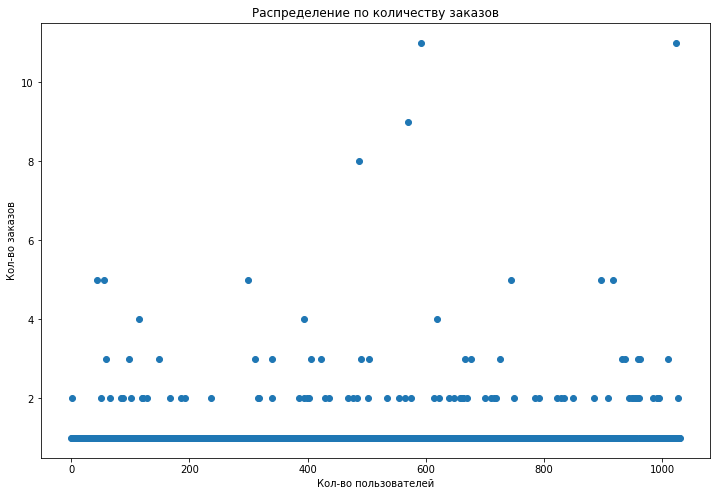

In [27]:
# Создадим сводную таблицу с кол-вом закзазов для каждого пользователя 

orders_count = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_count.sort_values(by='transaction_id', ascending=False) 
# Построим график
x_values = pd.Series(range(0, len(orders_count)))

plt.figure(figsize=(12,8)) 
 
plt.scatter(x_values, orders_count['transaction_id'])  

plt.ylabel('Кол-во заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по количеству заказов')
plt.show() 

Много пользователей с 1 и 2 заказами, 3 и более уже редкость

#### Подсчёт 95-й и 99-й перцентилей количества заказов на пользователя. Опредления границы для аномальных пользователей

In [28]:
print(np.percentile(orders_count['transaction_id'], [95, 99])) 

[2. 4.]


In [29]:
limit_order = 3 

#### Подсчёт 95-й и 99-й перцентилей стоимости заказов и построение точечной диаграмы. Опредления границы для аномальных пользователей

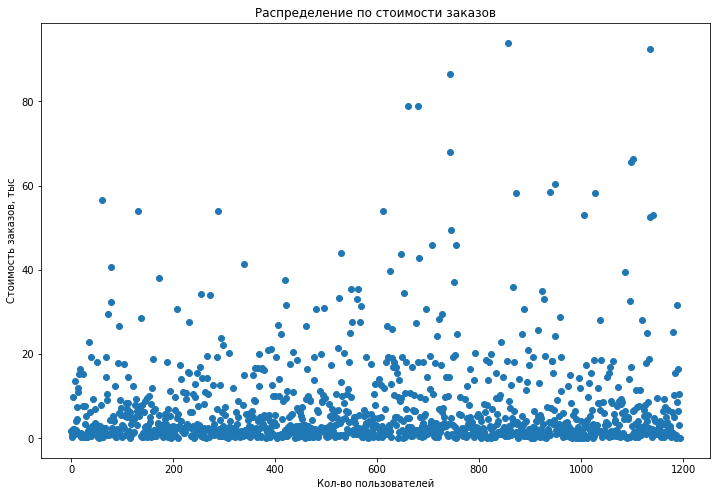

In [32]:
# Серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders_new['revenue'])))

plt.figure(figsize=(12,8))

# Избавимся от выбросов в стоимости заказов
orders_new = orders[orders['revenue'] < 200000]

# Построим график 
orders_new = orders[orders['revenue'] < 200000]
scattter_plot = plt.scatter(x_values, orders_new['revenue']/1000)  
plt.ylabel('Стоимость заказов, тыс') 
plt.xlabel('Кол-во пользователей') 

plt.title('Распределение по стоимости заказов')
plt.show() 

Есть определенные выбросы дорогих заказов, но ниже 20.000 сложно разобрать частоту появления, лучше опираться на перцентили.

In [ ]:
print(np.percentile(orders['revenue'], [95, 99]))  

In [ ]:
limit_revenue = 35000

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [ ]:
# Таблицы с данными по заказам на каждого пользователя

orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_a.columns=['visitors_id','orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_b.columns=['visitors_id','orders'] 

In [ ]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(0, 
                  index=np.arange
                  (visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
                  ),
                  name='orders'
                 )
    ],
    axis=0)
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series
        (0,
         index=np.arange(
             visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
         ),
         name='orders'
        )
    ],
    axis=0)

### Тест Манна-Уитни

**Нулевая гипотеза:** Конверсии в группах одинаковые

**Альтернативная гипотеза:** Различия между конверсиями есть

In [ ]:
result_1 = stats.mannwhitneyu(sample_a, sample_b)[1]

# Зададим aplha как 0.05
alpha = 0.05


print(f'Значение p-value : {result_1}')
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Среднее количество заказов на посетителя группы А: {:.1%}'.format(sample_a.mean()))
print('Среднее количество заказов на посетителя группы B: {:.1%}'.format(sample_b.mean())) 
print('Относительная разница показателей: {:.3}'.format(sample_b.mean() / sample_a.mean())) 

Исходя из теста разница между конверсиями в группах статистически значима (при уровне значимости в 0.05)

**Нулевая гипотеза:** Средний чек в группах одинаковый

**Альтернативная гипотеза:** Средний чек в группах разный

In [ ]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  


print(f'Значение p-value : {result_2}')
if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

    
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean())) 
print('Относительная разница показателей: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean() / 
                                                         orders[orders['group']=='A']['revenue'].mean())) 

Исходя из теста статистически значимых различий между средними чеками нет (при альфа = 0.05), не смотря на то, что математическая разница между значениями более 20%

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «чистым» данным.

Проверим гипотезы для отфильтрованных пользователей

In [ ]:
# Выберем не типичных пользователей 
many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > limit_order]['visitors_id'],
        orders_by_users_b[orders_by_users_b['orders'] > limit_order]['visitors_id'],
    ],
    axis=0,
)

expensive_orders = orders[orders['revenue'] > limit_revenue]['visitor_id']

# Объединяем их в один датафрейм 
abnormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(' ')
print('Кол-во анамальных пользователей: ', abnormal_users.shape[0])

In [ ]:
# Отфильтруем данные в группе А
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitors_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Отфильтруем данные в группе В
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitors_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)  

Проверяем те же гипотезы, но для 'чистых' данных

**Нулевая гипотеза:** Конверсии в группах одинаковые

**Альтернативная гипотеза:** Конверсии в группах различны

In [ ]:
result_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] 


print(f'Значение p-value : {result_3}') 

if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Среднее количество заказов на посетителя группы А: {:.1%}'.format(sample_a_filtered.mean()))
print('Среднее количество заказов на посетителя группы B: {:.1%}'.format(sample_b_filtered.mean())) 
print('Относительная разница показателей: {:.3}'.format(sample_b_filtered.mean() / sample_a_filtered.mean())) 

Результат аналогичен тесту для не фильтрованных даннных, конверсии имеют статистически значимые различия при уровне зачимости = 0.05


**Нулевая гипотеза:** Средний чек в группах одинаковый

**Альтернативная гипотеза:** Средний чек в группах различный

In [ ]:
result4 = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1] 

# Посчитаем среднием значения 


mean_revenue_a = orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean() 


mean_revenue_b = orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()


print(f'Значение p-value : {result4}')  


if result4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

    
print('Средняя чек группы А: {:.1f}'.format(mean_revenue_a))
print('Средний чек группы B: {:.1f}'.format(mean_revenue_b))
print('Относительная разница показателей: {:.3f}'.format(mean_revenue_b / mean_revenue_a))

Статистически значимых различий между средними чеками групп не оказалось при уровне значимости в 0.05

Кумулятивное количество заказов на посетителя в группах хоть и не до конца стабилизировалось, но в группе B оно значительно выше, что подтверждается статистическим тестом. Большее количество заказов при одинаковой цене является положительным результатом теста. А так же ввиду больших затрат на проведение теста рекомендуется завершить его и зафиксировать победу группы B

**Заключение:** В ходе работы была проведена приоритизация гипотез по фреймворкам ICE и RICE. Затем провел анализ
результатов A/B-теста, построил графики кумулятивной выручки, среднего чека,
конверсии по группам, а затем посчитал статистическую значимость различий конверсий
и средних чеков по сырым и очищенным данным. На основании анализа мной было
принято решение о нецелесообразности дальнейшего проведения теста.